In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:\\Users\\sachi\\Downloads\\Restaurant_Reviews.tsv",sep='\t')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.shape

(1000, 2)

In [7]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [9]:
data['char_count']=data['Review'].apply(len)

In [10]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [11]:
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [12]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
tokenizer = PunktSentenceTokenizer()
data['sent_count'] = data['Review'].apply(lambda x: len(tokenizer.tokenize(str(x))))

In [16]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,1
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [17]:
data[data['Liked']==1]['char_count'].mean()

55.88

In [18]:
data[data['Liked']==0]['char_count'].mean()

60.75

In [19]:
import re

In [20]:
data['Review'][1]

'Crust is not good.'

In [21]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [22]:
review

'Crust is not good '

In [23]:
review = review.lower()

In [24]:
review

'crust is not good '

In [25]:
review = review.split()

In [26]:
review

['crust', 'is', 'not', 'good']

In [27]:
from nltk.corpus import stopwords

In [28]:
import nltk

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')

In [31]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
review = [word for word in review if word not in set(all_stopwords)]

In [33]:
review

['crust', 'not', 'good']

In [34]:
from nltk.stem.porter import PorterStemmer

In [35]:
ps = PorterStemmer()

In [36]:
review = [ps.stem(word) for word in review]

In [37]:
review = " ".join(review)

In [38]:
review

'crust not good'

In [39]:
import re
custom_stopwords = {'don',"don't",'ain',"aren","coudn't","didn't",'didn','doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't"
                   'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",
                   'needn',"needn't","shan't",'shan','no','nor','not','shouldn',"shouldn't",
                    'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"}
corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [40]:
data['processed_text']=corpus

In [41]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,1,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [42]:
from wordcloud import WordCloud

In [43]:
!pip install WordCloud

In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [46]:
positive = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))

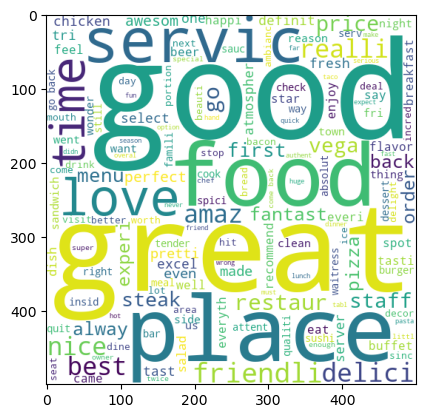

In [47]:
plt.imshow(positive)

In [48]:
negetive = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))

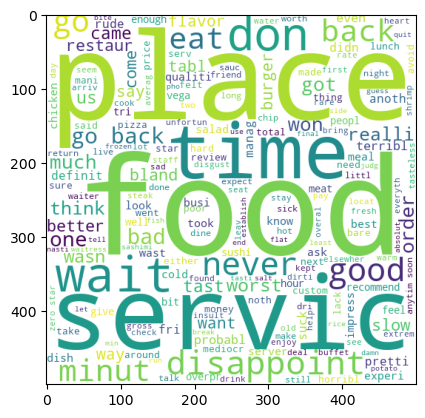

In [49]:
plt.imshow(negetive)

In [50]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,1,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cv = CountVectorizer(max_features=1500)

In [53]:
X = cv.fit_transform(corpus).toarray()

In [54]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
X.shape

(1000, 1500)

In [56]:
y = data['Liked']

In [57]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[49 47]
 [18 86]]
0.675
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        96
           1       0.65      0.83      0.73       104

    accuracy                           0.68       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.68      0.67       200



In [64]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[86 10]
 [31 73]]
0.795
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        96
           1       0.88      0.70      0.78       104

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



In [65]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[81 15]
 [27 77]]
0.79
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        96
           1       0.84      0.74      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



In [66]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming `corpus` is your preprocessed text data and `y` is your labels.
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

# Save the vectorizer
joblib.dump(cv, 'count_v_res.pkl')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf, 'Restaurant_review_model.pkl')


['Restaurant_review_model.pkl']

In [ ]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("400x300")

        # Load pre-trained model and vectorizer
        self.model = joblib.load('Restaurant_review_model.pkl')  # Ensure correct path
        self.vectorizer = joblib.load('count_v_res.pkl')  # Ensure correct path

        title_font = ('Helvetica', 16, 'bold')
        self.label = ttk.Label(master, text="Enter your restaurant review:", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='lightgray')
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', 'gray'), ('active', 'blue')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', "aren", "coudn't", "didn't", 'didn', 'doesn', "doesn't", 'hadn', 
                            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 
                            'mustn', "mustn't", 'needn', "needn't", "shan't", 'shan', 'no', 'nor', 'not', 'shouldn', 
                            "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords
        
        # Preprocessing the review text
        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)
        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            
            # Confirm feature count matches
            assert processed_input_vectorized.shape[1] == len(self.vectorizer.get_feature_names_out()), \
                f"Feature mismatch: {processed_input_vectorized.shape[1]} vs {len(self.vectorizer.get_feature_names_out())}"

            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()
